In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import scipy as sc

In [35]:
import csv

pm_ra = {'duffau_group_a' : [], 'duffau_group_b' : [], 'duffau_group_h' : []}
pm_dec = {'duffau_group_a' : [], 'duffau_group_b' : [], 'duffau_group_h' : []}

with open('../Data/all_duffau_data.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for line in csv_reader:
        pm_ra[line["source"]].append(float(line["pmra"]))
        pm_dec[line["source"]].append(float(line["pmdec"]))



In [42]:
def makeEllipsePlot(group):
    cov = np.cov(pm_ra[group], pm_dec[group])
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ax = plt.subplot(111, aspect='equal')
    for j in range(1, 4):
        ell = Ellipse(xy=(np.mean(pm_ra[group]), np.mean(pm_dec[group])),
                      width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])))
        ell.set_facecolor('none')
        ell.set_edgecolor('b')
        ax.add_artist(ell)



    plt.scatter(pm_ra[group], pm_dec[group])
    plt.xlim([4, -4])
    plt.ylim([-4, 4])
    plt.show()

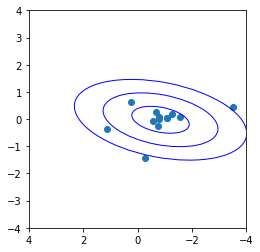

In [43]:
#pm_ra = [-0.13, 0.35, -0.62, 0.03, 0.03, 0.11]
#pm_dec = [-0.12, -0.05, -0.21, -0.31, 0.02, -0.64]

group = 'duffau_group_a'
makeEllipsePlot(group)

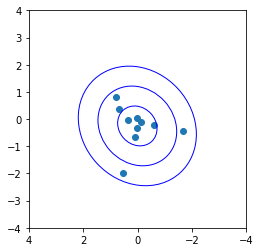

In [44]:
group = 'duffau_group_b'
makeEllipsePlot(group)

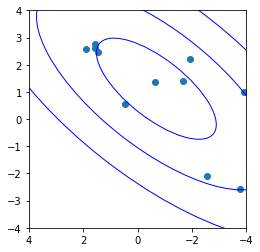

In [45]:
group = 'duffau_group_h'
makeEllipsePlot(group)